In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
from collections import defaultdict
import pandas as pd
import glob
import os

R = 'Resistance (Ohm)'
I = 'Current (A)'
H = 'Field set (Oe)'
V = 'Voltage (V)'
dRdH = 'dR/dH'
indx = 'index'
# Shortcut to the GDrive
src_path = '/gdrive/MyDrive/PhD/CurrentFieldI-H/Data'

data = {}
all_files = glob.glob(os.path.join(src_path, "*.csv"))
for fn in all_files:
  dev = os.path.basename(fn).split("_")[0]
  df = pd.read_csv(fn, comment='#')
  df[indx] = df.index
  data[fn] = df

In [ ]:
data[fn]

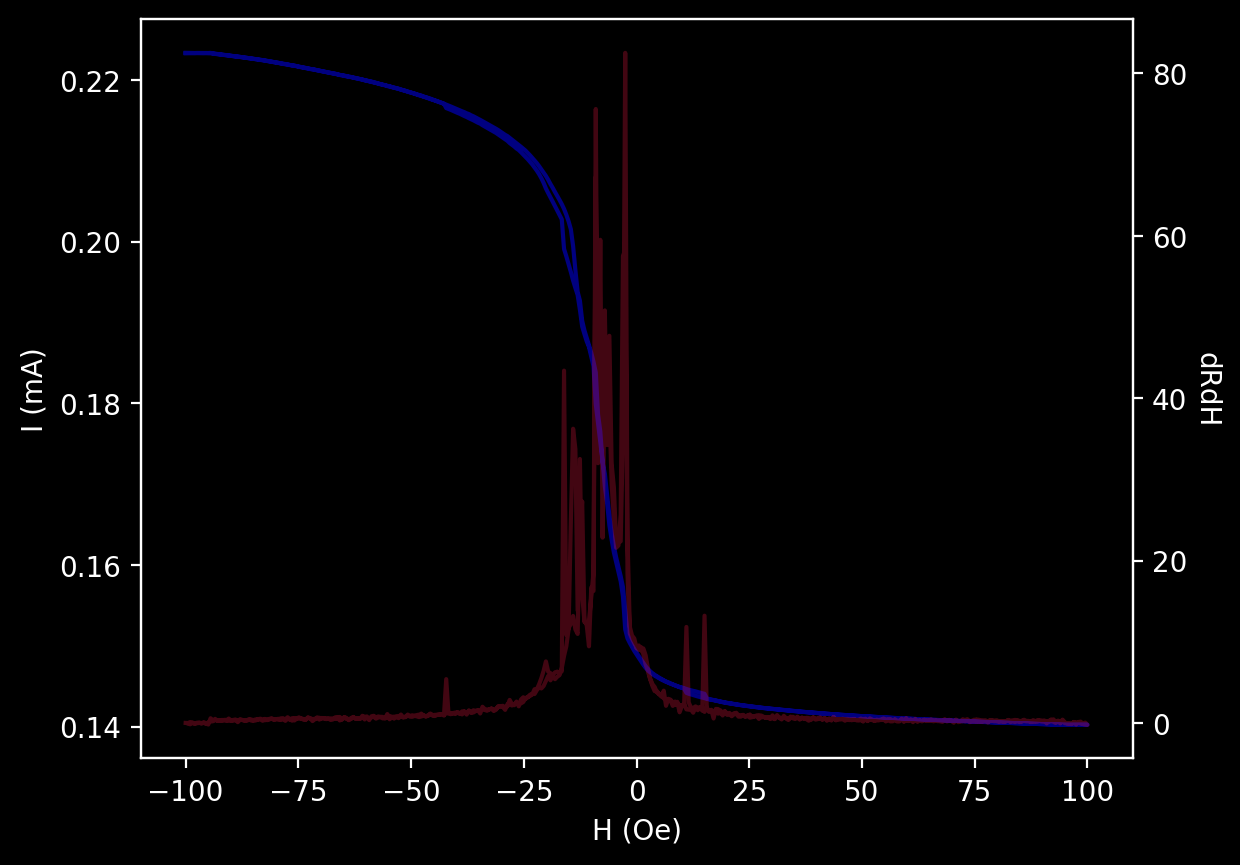

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('dark_background'):
  fig, ax = plt.subplots(dpi=200)
  tdf = data[fn]
  ax.plot(tdf[H], tdf[I]*1e3 , color='navy')
  ax2 = ax.twinx()
  ax2.plot(tdf[H], tdf[dRdH], color='crimson', alpha=0.3)
  ax.set_xlabel("H (Oe)")
  ax.set_ylabel("I (mA)")
  ax2.set_ylabel("dRdH", rotation=270, labelpad=12)

In [ ]:
import altair as alt
import ipywidgets as widgets

file_picker = widgets.SelectMultiple(
    options=list(all_files),
    value=list(all_files),
    description='Files')

@widgets.interact(symbol=all_files)
def render(symbol):
  print(symbol)
  selected = data[symbol]

  return (alt.Chart(selected).encode(
      x=H,
      y=I,
      order=indx
  ).mark_line(color='red', size=1) + alt.Chart(selected).mark_line().encode(
      x=H,
      y=dRdH,
      order=indx,
      opacity=alt.value(0.5)
  ).mark_line(color='blue', size=1)).resolve_scale(y='independent')

interactive(children=(Dropdown(description='symbol', options=('/gdrive/MyDrive/PhD/CurrentFieldI-H/Data/4649_2…